In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import matplotlib


In [10]:
analysis_dir = Path(Path.home(), "Documents/xray/sample_bench/data/7mhf")
file_names = ["131_1_state/sample_xray_0.csv", "129_2_state/sample_xray_0.csv", "130_2_cond/sample_xray_0+xray_1.csv", "137_4_state_1_cond/sample_xray_0.csv", "138_4_state_2_cond/sample_xray_0+xray_1.csv"]

score_dfs = list()
for file_name in file_names:
    score_file = Path(analysis_dir, file_name)
    score_df = pd.read_csv(score_file)
    score_dfs.append(score_df)
    print(np.mean(score_df["r_free_0"]), np.min(score_df["r_free_0"]))


0.29127678456602096 0.2789076034764614
0.2796006816242366 0.2693942663253063
0.2472103517942406 0.2389894878947336
0.3129034426495706 0.3003582023925299
0.25902713732745675 0.2481711342771461


In [15]:
font_size = 16 
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 10}

axes = {'labelsize': font_size}

xtick = {'labelsize': font_size}
ytick = {'labelsize': font_size}
legend = {'fontsize': font_size,
          'markerscale': 2,
          'title_fontsize': font_size,
          'loc': "lower left"}

matplotlib.rc('font', **font)
matplotlib.rc('axes', **axes)
matplotlib.rc('xtick', **xtick)
matplotlib.rc('ytick', **ytick)
matplotlib.rc('legend', **legend)

In [16]:

colors = list()
colors.append(mcolors.CSS4_COLORS["dodgerblue"])
colors.append(mcolors.CSS4_COLORS["orange"])
colors.append(mcolors.CSS4_COLORS["orangered"])

fig = plt.figure(figsize=(20,10))

for i in range(len(score_dfs)):
    n_state = 2**i
    score_df = score_dfs[i]
    x = i


    break

    # y = np.mean(score_df["xray_0_min_0_r_free_0"])
    # std = np.std(score_df["xray_0_min_0_r_free_0"])

    # min_val = np.min(score_df["xray_0_min_0_r_free_0"])

    # plt.scatter(x, np.mean(score_df["xray_0_min_0_r_free_0"]))
    # plt.errorbar(x, np.mean(score_df["xray_0_min_0_r_free_0"]), np.std(score_df["xray_0_min_0_r_free_0"]), linestyle='None', marker='o', capsize=3, c=colors[0])
    # plt.scatter(x, np.min(score_df["xray_0_min_0_r_free_0"]), c=colors[0])

    # plt.scatter(x, np.mean(score_df["xray_0_min_0_r_work_0"]), c=colors[1])
    # plt.errorbar(x, np.mean(score_df["xray_0_min_0_r_work_0"]), np.std(score_df["xray_0_min_0_r_work_0"]), linestyle='None', marker='o', capsize=3, c=colors[1])
    # plt.scatter(x, np.min(score_df["xray_0_min_0_r_work_0"]), c=colors[1])

# my_xticks = ["1-state",'2-state','4-state','8-state']
# plt.xticks(list(range(len(score_dfs))), my_xticks)

# custom_legend = list()
# custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[0], linestyle='None'))
# custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[1], linestyle='None'))
# plt.legend(custom_legend, ['r_free', 'r_work'])

# fig_file = Path(Path.home(), "Desktop/n_state_score_distributions.png")
# plt.savefig(fig_file)


<Figure size 2000x1000 with 0 Axes>

In [40]:
from scipy import stats

# Initialise a list of combinations of groups that are significantly different
significant_combinations = [[(1,2), .0001], [(2,3), .0001], [(4,5), .0001]]

print(significant_combinations)

[[(1, 2), 0.0001], [(2, 3), 0.0001], [(4, 5), 0.0001]]


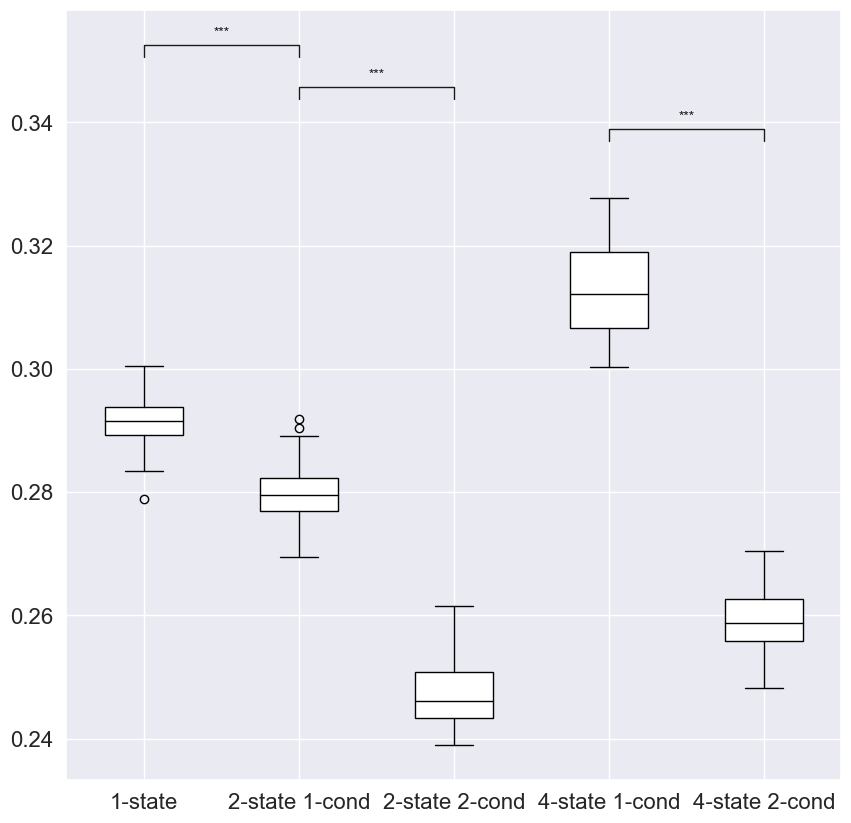

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

bplot1 = ax.boxplot([score_df["r_free_0"] for score_df in score_dfs],
                    vert=True,
                    patch_artist=True,
                    labels=["1-state", "2-state 1-cond", "2-state 2-cond", "4-state 1-cond", "4-state 2-cond"],
                     boxprops=dict(facecolor="white"),
                     medianprops=dict(color="black")
                     )

bottom, top = ax.get_ylim()
yrange = top - bottom

# Significance bars
for i, significant_combination in enumerate(significant_combinations):
    # Columns corresponding to the datasets of interest
    x1 = significant_combination[0][0]
    x2 = significant_combination[0][1]
    # What level is this bar among the bars above the plot?
    level = len(significant_combinations) - i
    # Plot the bar
    bar_height = (yrange * 0.07 * level) + top
    bar_tips = bar_height - (yrange * 0.02)
    plt.plot(
        [x1, x1, x2, x2],
        [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k'
    )
    # Significance level
    p = significant_combination[1]
    if p < 0.001:
        sig_symbol = '***'
    elif p < 0.01:
        sig_symbol = '**'
    elif p < 0.05:
        sig_symbol = '*'
    text_height = bar_height + (yrange * 0.01)
    plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k')

fig_file = Path(Path.home(), "Desktop/sample.png")
plt.savefig(fig_file)


In [39]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

# bplot1 = ax.boxplot([score_df["r_free_0"] for score_df in score_dfs],
#                     vert=True,
#                     patch_artist=True,
#                     labels=["1-state", "2-state 1-cond", "2-state 2-cond", "4-state 1-cond", "4-state 2-cond"],
#                      boxprops=dict(facecolor="white"),
#                      medianprops=dict(color="black")
#                      )

# fig_file = Path(Path.home(), "Desktop/sample.png")
# plt.savefig(fig_file)

